# Projeto: Conversão de Imagem para Tons de Cinza e Binarização

Este notebook apresenta uma implementação **manual**, sem uso de bibliotecas prontas para o processo de conversão, de um algoritmo que transforma uma imagem colorida em:

- Imagem em **tons de cinza** (escala de 0 a 255)
- Imagem **binária** (preto e branco, com valores 0 ou 255)

O projeto foi desenvolvido como parte do desafio proposto no bootcamp [**Machine Learning Training**](https://web.dio.me/track/bairesdev-machine-learning-training) promovido pela **BairesDev** em parceria com a **DIO**.


**Aluna:** Natália Ferreira  
**Tema:** Pré-processamento de Imagens  
**Técnicas utilizadas:** manipulação de arrays com NumPy, lógica de imagem digital, thresholding

---

O objetivo é compreender de forma prática como funciona o processamento de imagens em níveis básicos, preparando o terreno para aplicações futuras em Visão Computacional e Machine Learning.



In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Faz o upload da imagem que será usada
uploaded = files.upload()

# Abre a imagem enviada
img = Image.open(next(iter(uploaded))).convert("RGB")  # Garante que a imagem esteja em RGB

Saving Perfil.JPG to Perfil (1).JPG


In [7]:
# Função para converter RGB → Escala de Cinza

def rgb_to_grayscale(image):
    """
    Converte uma imagem RGB para escala de cinza, aplicando pesos perceptuais para R, G e B.
    Fórmula padrão: Gray = 0.299 * R + 0.587 * G + 0.114 * B
    """
    np_img = np.array(image)
    gray_img = (
        0.299 * np_img[:, :, 0] +
        0.587 * np_img[:, :, 1] +
        0.114 * np_img[:, :, 2]
    ).astype(np.uint8)  # Converte para inteiro de 8 bits
    return gray_img

In [8]:
# Função para converter Cinza → Binária

def grayscale_to_binary(gray_img, threshold=127):
    """
    Converte imagem em tons de cinza para imagem binária (preto e branco).
    Pixels com valor > threshold viram 255 (branco), senão viram 0 (preto).
    """
    binary_img = np.where(gray_img > threshold, 255, 0).astype(np.uint8)
    return binary_img

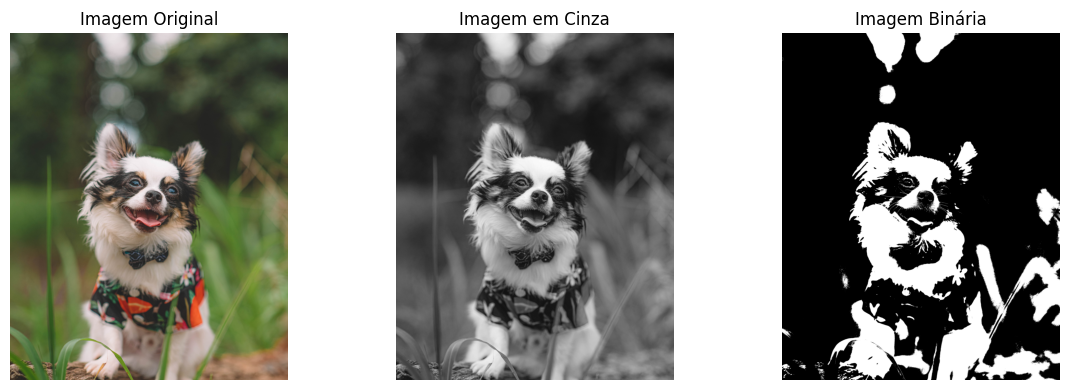

In [9]:
# Processa a imagem: de RGB para cinza e depois para binária
gray = rgb_to_grayscale(img)
binary = grayscale_to_binary(gray)

# Exibe as imagens lado a lado
plt.figure(figsize=(12, 4))

# Imagem original
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Imagem Original")
plt.axis("off")

# Imagem em tons de cinza
plt.subplot(1, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title("Imagem em Cinza")
plt.axis("off")

# Imagem binária
plt.subplot(1, 3, 3)
plt.imshow(binary, cmap='gray')
plt.title("Imagem Binária")
plt.axis("off")

plt.tight_layout()
plt.show()


---
Desenvolvido por: **Natália Ferreira**  
Desafio proposto no Bootcamp de Machine Learning (DIO + BairesDev)
